In [139]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../../inkscape/cap6/crankshaft/"
PATH_EPS=BASE_PATH+"/../../../../../eps/cap6/crankshaft/"
fname = "speedup_hybrid_lumped_17810_73800"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = True
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceL|inear Local Method - LUMPED
#df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P1-P2-P4.csv', sep=";", skiprows=[0])
df = pd.read_csv('./data/crankshaft_17810_73800_lumped_hybrid.csv', sep=";")
pd.set_option('expand_frame_repr', False, 'display.max_rows', 999, 'display.max_columns', 999)
df[ df['NumberRanks'] ==  2 ]

NumberRanks  NumberThreads  Nodes_X_Threads MPI+OpenMP  Time_17810_P1  Time_73800_P1  Time_17810_P2  Time_73800_P2  Time_17810_P4  Time_73800_P4 Time_17810_P6 Time_73800_P6  SpeedUp_17810_P1  SpeedUp_73800_P1  SpeedUp_17810_P2  SpeedUp_73800_P2  SpeedUp_17810_P4  SpeedUp_73800_P4 SpeedUp_17810_P6 SpeedUp_73800_P6  Efficiency_17810_P1  Efficiency_73800_P1  Efficiency_17810_P2  Efficiency_73800_P2  Efficiency_17810_P4  Efficiency_73800_P4 Efficiency_17810_P6 Efficiency_73800_P6
7             2              1                2        2+1         5.1718        21.9725        34.1691       144.1428       475.0730      2092.2066     3476.3277             -            1.8763            1.8888            1.8018            1.7778            1.8734            1.9703           2.0000                -               0.9381               0.9444               0.9009               0.8889               0.9367               0.9852              1.0000                   -
8             2              2                4        2+2         3.5376        16.0666        19.9394        89.3166       323.5063      1584.0966     2210.0603             -            2.7430            2.5831            3.0877            2.8691            2.7511            2.6023           3.1459                -               0.6858               0.6458               0.7719               0.7173               0.6878               0.6506              0.7865                   -
9             2              4                8        2+4         2.1354         9.1778        11.7910        50.7559       178.0519       878.2139     1064.5121             -            4.5442            4.5220            5.2215            5.0489            4.9985            4.6940           6.5313                -               0.5680               0.5653               0.6527               0.6311               0.6248               0.5867              0.8164                   -
10            2              8               16        2+8         1.4901         6.2727         7.5774        34.2813        98.3698       521.6642      581.5197             -            6.5121            6.6164            8.1251            7.4752            9.0475            7.9022          11.9560                -               0.4070               0.4135               0.5078               0.4672               0.5655               0.4939              0.7473                   -
11            2             16               32       2+16         1.0779         4.7927         5.9718        25.6492        69.2756       350.7683      367.0900             -            9.0024            8.6595           10.3096            9.9909           12.8472           11.7522          18.9399                -               0.2813               0.2706               0.3222               0.3122               0.4015               0.3673              0.5919                   -
12            2             20               40       2+20         1.1687         4.7016         6.0619        26.2539        62.5597       321.5677      337.6015             -            8.3030            8.8273           10.1564            9.7608           14.2264           12.8194          20.5943                -               0.2076               0.2207               0.2539               0.2440               0.3557               0.3205              0.5149                   -
13            2             40               80       2+40         0.8866         3.6459         5.8314        23.0955        56.2860       267.0898      371.9026             -           10.9448           11.3833           10.5578           11.0956           15.8121           15.4341          18.6948                -               0.1368               0.1423               0.1320               0.1387               0.1977               0.1929              0.2337                   -

In [147]:
# df17p1=df.groupby('NumberRanks').agg({'SpeedUp_17810_P1': 'max'})
# df17p1=df17p1.rename(columns={'SpeedUp_17810_P1': 'SpeedUp_17810_P1_Max'})
# df17p1=pd.merge(df17p1, df, left_on='SpeedUp_17810_P1_Max', right_on='SpeedUp_17810_P1')
# df17p1

# df73p1=df.groupby('NumberRanks').agg({'SpeedUp_73800_P1': 'max'})
# df73p1=df73p1.rename(columns={'SpeedUp_73800_P1': 'SpeedUp_73800_P1_Max'})
# df73p1=pd.merge(df73p1, df, left_on='SpeedUp_73800_P1_Max', right_on='SpeedUp_73800_P1')
# df73p1

# df17p2=df.groupby('NumberRanks').agg({'SpeedUp_17810_P2': 'max'})
# df17p2=df17p2.rename(columns={'SpeedUp_17810_P2': 'SpeedUp_17810_P2_Max'})
# df17p2=pd.merge(df17p2, df, left_on='SpeedUp_17810_P2_Max', right_on='SpeedUp_17810_P2')
# df17p2

# df73p2=df.groupby('NumberRanks').agg({'SpeedUp_73800_P2': 'max'})
# df73p2=df73p2.rename(columns={'SpeedUp_73800_P2': 'SpeedUp_73800_P2_Max'})
# df73p2=pd.merge(df73p2, df, left_on='SpeedUp_73800_P2_Max', right_on='SpeedUp_73800_P2')
# df73p2

# df17p4=df.groupby('NumberRanks').agg({'SpeedUp_17810_P4': 'max'})
# df17p4=df17p4.rename(columns={'SpeedUp_17810_P4': 'SpeedUp_17810_P4_Max'})
# df17p4=pd.merge(df17p4, df, left_on='SpeedUp_17810_P4_Max', right_on='SpeedUp_17810_P4')
# df17p4

# df73p4=df.groupby('NumberRanks').agg({'SpeedUp_73800_P4': 'max'})
# df73p4=df73p4.rename(columns={'SpeedUp_73800_P4': 'SpeedUp_73800_P4_Max'})
# df73p4=pd.merge(df73p4, df, left_on='SpeedUp_73800_P4_Max', right_on='SpeedUp_73800_P4')
# df73p4

df17p6=df.groupby('NumberRanks').agg({'SpeedUp_17810_P6': 'max'})
# df17p6=df17p6.rename(columns={'SpeedUp_17810_P6': 'SpeedUp_17810_P6_Max'})
# df17p6=pd.merge(df17p6, df, left_on='SpeedUp_17810_P6_Max', right_on='SpeedUp_17810_P6')
# df17p6=df17p6[ df17p6['SpeedUp_17810_P6_Max'] != '-' ]
df17p6

df73p6=df.groupby('NumberRanks').agg({'SpeedUp_73800_P6': 'max'})
df73p6=df73p6.rename(columns={'SpeedUp_73800_P6': 'SpeedUp_73800_P6_Max'})
df73p6=pd.merge(df73p6, df, left_on='SpeedUp_73800_P6_Max', right_on='SpeedUp_73800_P6')
df73p6=df73p6[ df73p6['SpeedUp_73800_P6_Max'] != '-' ]
df73p6


df = pd.merge(df, df17p1, how='outer', on='MPI+OpenMP', suffixes=('', '_y'))
df = df.drop([col for col in df.columns if '_y' in col], axis=1)
df = pd.merge(df, df73p1, how='outer', on='MPI+OpenMP', suffixes=('', '_y'))
df = df.drop([col for col in df.columns if '_y' in col], axis=1)
df = pd.merge(df, df17p2, how='outer', on='MPI+OpenMP', suffixes=('', '_y'))
df = df.drop([col for col in df.columns if '_y' in col], axis=1)
df = pd.merge(df, df73p2, how='outer', on='MPI+OpenMP', suffixes=('', '_y'))
df = df.drop([col for col in df.columns if '_y' in col], axis=1)
df = pd.merge(df, df17p4, how='outer', on='MPI+OpenMP', suffixes=('', '_y'))
df = df.drop([col for col in df.columns if '_y' in col], axis=1)
df = pd.merge(df, df73p4, how='outer', on='MPI+OpenMP', suffixes=('', '_y'))
df = df.drop([col for col in df.columns if '_y' in col], axis=1)
# df = pd.merge(df, df17p6, how='outer', on='MPI+OpenMP', suffixes=('', '_y'))
# df = df.drop([col for col in df.columns if '_y' in col], axis=1)
# df = pd.merge(df, df73p6, how='outer', on='MPI+OpenMP', suffixes=('', '_y'))
# df = df.drop([col for col in df.columns if '_y' in col], axis=1)


df.loc[df.index[0], 'SpeedUp_17810_P1_Max'] = 0.0
df.loc[df.index[0], 'SpeedUp_17810_P2_Max'] = 0.0
df.loc[df.index[0], 'SpeedUp_17810_P4_Max'] = 0.0
# df.loc[df.index[0], 'SpeedUp_17810_P6_Max'] = 0.0
df.loc[df.index[0], 'SpeedUp_73800_P1_Max'] = 0.0
df.loc[df.index[0], 'SpeedUp_73800_P2_Max'] = 0.0
df.loc[df.index[0], 'SpeedUp_73800_P4_Max'] = 0.0
# df.loc[df.index[0], 'SpeedUp_73800_P6_Max'] = 0.0
df17p6
print(df.groupby('NumberRanks').agg({'SpeedUp_17810_P6': 'max'}))
df[ df['NumberRanks'] == 2]

            SpeedUp_17810_P6
NumberRanks                 
1                          -
2                     6.5313
4                     5.9341
8                     9.0397
16                   74.1826
20                   98.6800
25                   62.0675
30                   69.6730


NumberRanks  NumberThreads  Nodes_X_Threads MPI+OpenMP  Time_17810_P1  Time_73800_P1  Time_17810_P2  Time_73800_P2  Time_17810_P4  Time_73800_P4 Time_17810_P6 Time_73800_P6  SpeedUp_17810_P1  SpeedUp_73800_P1  SpeedUp_17810_P2  SpeedUp_73800_P2  SpeedUp_17810_P4  SpeedUp_73800_P4 SpeedUp_17810_P6 SpeedUp_73800_P6  Efficiency_17810_P1  Efficiency_73800_P1  Efficiency_17810_P2  Efficiency_73800_P2  Efficiency_17810_P4  Efficiency_73800_P4 Efficiency_17810_P6 Efficiency_73800_P6  SpeedUp_17810_P1_Max  SpeedUp_73800_P1_Max  SpeedUp_17810_P2_Max  SpeedUp_73800_P2_Max  SpeedUp_17810_P4_Max  SpeedUp_73800_P4_Max
7             2              1                2        2+1         5.1718        21.9725        34.1691       144.1428       475.0730      2092.2066     3476.3277             -            1.8763            1.8888            1.8018            1.7778            1.8734            1.9703           2.0000                -               0.9381               0.9444               0.9009               0.8889               0.9367               0.9852              1.0000                   -                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN
8             2              2                4        2+2         3.5376        16.0666        19.9394        89.3166       323.5063      1584.0966     2210.0603             -            2.7430            2.5831            3.0877            2.8691            2.7511            2.6023           3.1459                -               0.6858               0.6458               0.7719               0.7173               0.6878               0.6506              0.7865                   -                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN
9             2              4                8        2+4         2.1354         9.1778        11.7910        50.7559       178.0519       878.2139     1064.5121             -            4.5442            4.5220            5.2215            5.0489            4.9985            4.6940           6.5313                -               0.5680               0.5653               0.6527               0.6311               0.6248               0.5867              0.8164                   -                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN
10            2              8               16        2+8         1.4901         6.2727         7.5774        34.2813        98.3698       521.6642      581.5197             -            6.5121            6.6164            8.1251            7.4752            9.0475            7.9022          11.9560                -               0.4070               0.4135               0.5078               0.4672               0.5655               0.4939              0.7473                   -                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN
11            2             16               32       2+16         1.0779         4.7927         5.9718        25.6492        69.2756       350.7683      367.0900             -            9.0024            8.6595           10.3096            9.9909           12.8472           11.7522          18.9399                -               0.2813               0.2706               0.3222               0.3122               0.4015               0.3673              0.5919                   -                   NaN                   NaN                   NaN                   NaN                   NaN                   NaN
12            2             20               40       2+20         1.1687         4.7016         6.0619        26.2539        62.5597       321.5677      337.6015             -            8.3030            8.8273           10.1564            9.7608           14.2264           12.8194          20.5943 

In [69]:
# df['SpeedUp_17810_P1_Max'] = pd.Series(df['SpeedUp_17810_P1_Max']).interpolate()
# df['SpeedUp_17810_P2_Max'] = pd.Series(df['SpeedUp_17810_P2_Max']).interpolate()
# df['SpeedUp_17810_P4_Max'] = pd.Series(df['SpeedUp_17810_P4_Max']).interpolate()
# df['SpeedUp_73800_P1_Max'] = pd.Series(df['SpeedUp_73800_P1_Max']).interpolate()
# df['SpeedUp_73800_P2_Max'] = pd.Series(df['SpeedUp_73800_P2_Max']).interpolate()
# df['SpeedUp_73800_P4_Max'] = pd.Series(df['SpeedUp_73800_P4_Max']).interpolate()

In [70]:
# Rename columns
df = df.rename(columns={"SpeedUp_17810_P1": "17810_P1",
                        "SpeedUp_17810_P2": "17810_P2",
                        "SpeedUp_17810_P4": "17810_P4",
                        "SpeedUp_17810_P6": "17810_P6",
                        "SpeedUp_73800_P1": "73800_P1",
                        "SpeedUp_73800_P2": "73800_P2",
                        "SpeedUp_73800_P4": "73800_P4",
                        "SpeedUp_73800_P6": "73800_P6",
                        "SpeedUp_17810_P1_Max": "17810_P1_MAX",
                        "SpeedUp_73800_P1_Max": "73800_P1_MAX",
                        "SpeedUp_17810_P2_Max": "17810_P2_MAX",
                        "SpeedUp_73800_P2_Max": "73800_P2_MAX",
                        "SpeedUp_17810_P4_Max": "17810_P4_MAX",
                        "SpeedUp_73800_P4_Max": "73800_P4_MAX",
                        "SpeedUp_17810_P6_Max": "17810_P6_MAX",
                        "SpeedUp_73800_P6_Max": "73800_P6_MAX"})

df.columns

Index(['NumberRanks', 'NumberThreads', 'Nodes_X_Threads', 'MPI+OpenMP',
       'Time_17810_P1', 'Time_73800_P1', 'Time_17810_P2', 'Time_73800_P2',
       'Time_17810_P4', 'Time_73800_P4', 'Time_17810_P6', 'Time_73800_P6',
       '17810_P1', '73800_P1', '17810_P2', '73800_P2', '17810_P4', '73800_P4',
       '17810_P6', '73800_P6', 'Efficiency_17810_P1', 'Efficiency_73800_P1',
       'Efficiency_17810_P2', 'Efficiency_73800_P2', 'Efficiency_17810_P4',
       'Efficiency_73800_P4', 'Efficiency_17810_P6', 'Efficiency_73800_P6',
       '17810_P1_MAX', '73800_P1_MAX', '17810_P2_MAX', '73800_P2_MAX',
       '17810_P4_MAX', '73800_P4_MAX', '17810_P6_MAX', '73800_P6_MAX'],
      dtype='object')

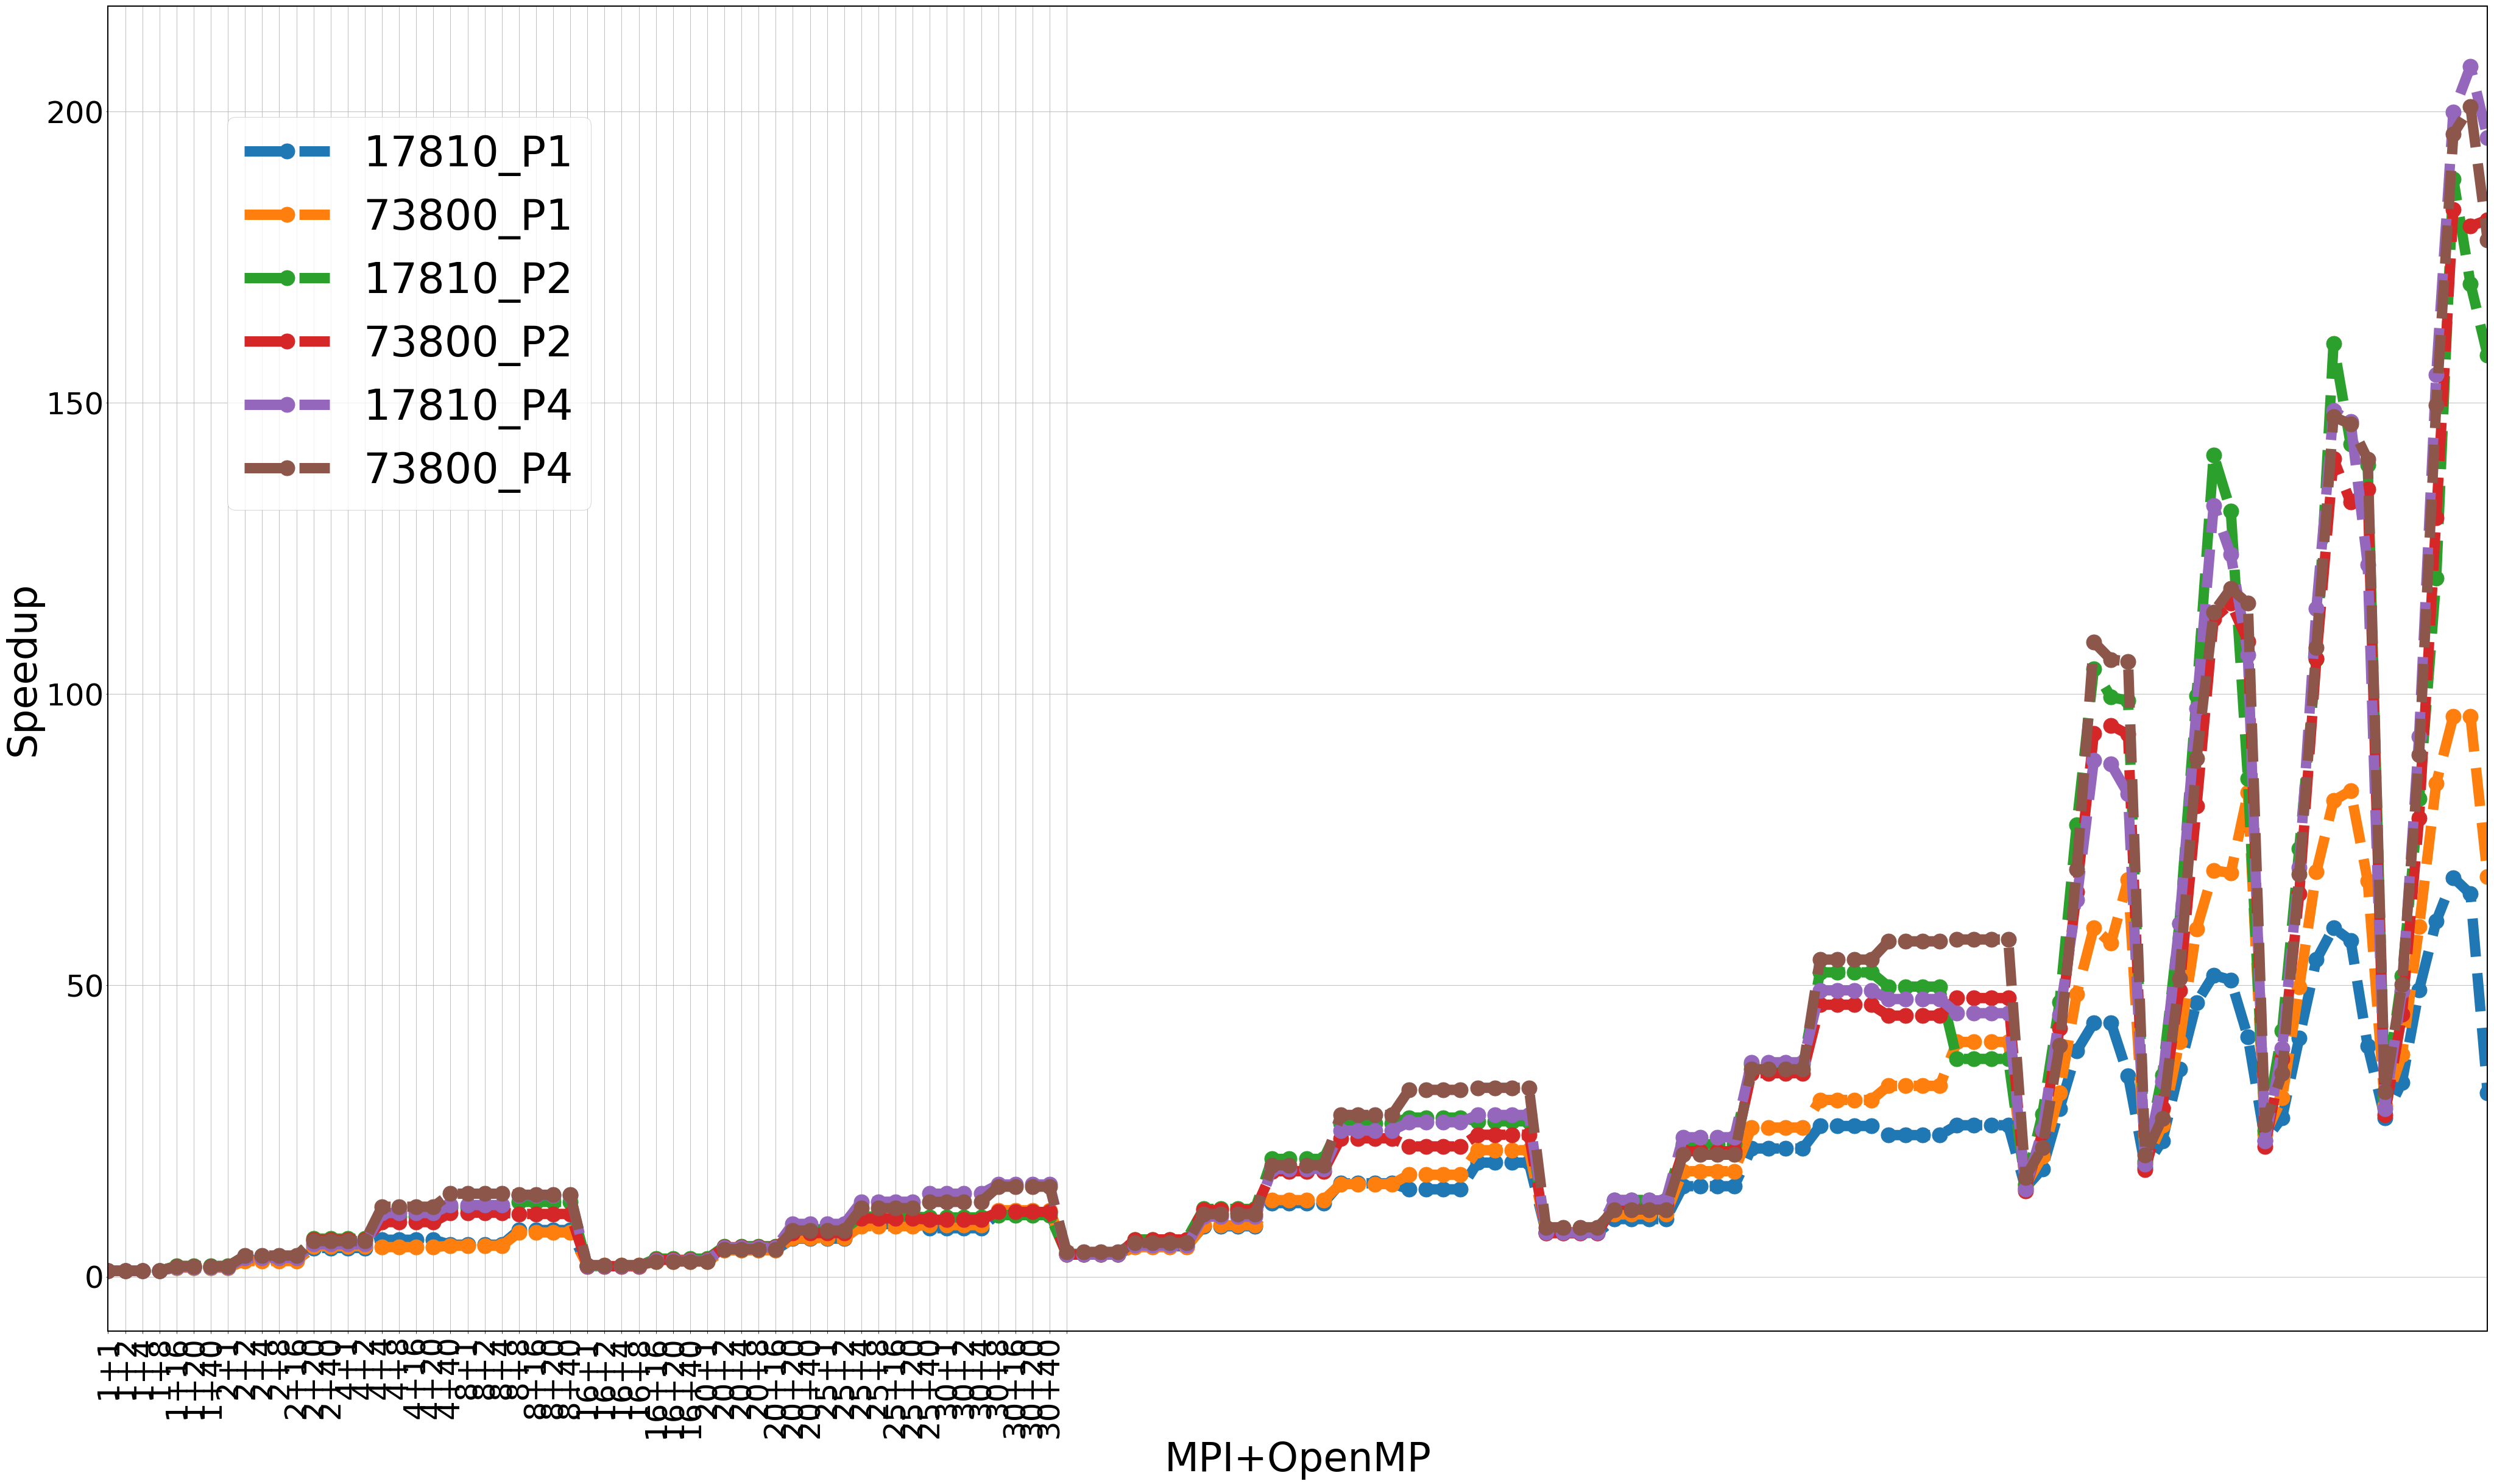

In [72]:
#  Plot bars
df.loc[0, 'MPI+OpenMP'] = '1  Node - Pure MPI'
df.loc[7, 'MPI+OpenMP'] = '2 Nodes - Pure MPI'
df.loc[14, 'MPI+OpenMP'] = '4 Nodes - Pure MPI'
df.loc[21, 'MPI+OpenMP'] = '8 Nodes - Pure MPI'
df.loc[28, 'MPI+OpenMP'] = '16 Nodes - Pure MPI'
df.loc[35, 'MPI+OpenMP'] = '20 Nodes - Pure MPI'
df.loc[42, 'MPI+OpenMP'] = '25 Nodes - Pure MPI'
df.loc[49, 'MPI+OpenMP'] = '30 Nodes - Pure MPI'


fig = df[['MPI+OpenMP', '17810_P1', '73800_P1', '17810_P2', '73800_P2', '17810_P4', '73800_P4']].\
plot(kind='line', 
     x='MPI+OpenMP',
     linestyle='--',
     linewidth=17.0,
     marker='.', 
     markersize=50,
     fontsize=30, 
     figsize=(70, 40)
).get_figure()



# plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], ["1+1", "1+2", "1+4", "1+8", "1+16", "1+20", "1+40", "2+16", "2+20", "2+40", "4+8", "4+16", "4+20", "4+40", "8+8", "8+16", "8+20", "8+40", "16+4", "16+8", "16+16", "16+20", "20+8", "20+16", "20+20", "25+8", "25+16", "25+20", "30+8", "30+16", "30+20"], fontsize=20)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56], ["1+1", "1+2", "1+4", "1+8", "1+16", "1+20", "1+40", "2+1", "2+2", "2+4", "2+8", "2+16", "2+20", "2+40", "4+1", "4+2", "4+4", "4+8", "4+16", "4+20", "4+40", "8+1", "8+2", "8+4", "8+8", "8+16", "8+20", "8+40", "16+1", "16+2", "16+4", "16+8", "16+16", "16+20", "16+40", "20+1", "20+2", "20+4", "20+8", "20+16", "20+20", "20+40", "25+1", "25+2", "25+4", "25+8", "25+16", "25+20", "25+40", "30+1", "30+2", "30+4", "30+8", "30+16", "30+20", "30+40"], fontsize=20)
# plt.yticks([1, 2, 4, 8, 16, 32, 64, 128, 200, 256], [1, 2, 4, 8, 16, 32, 64, 128, 200, 256], fontsize=20)

# select_columns=['MPI+OpenMP', '17810_P1', '73800_P1']
# fig = df_speedup[select_columns].plot(
#     kind='line', 
#     x='MPI+OpenMP', 
#     linestyle='-', 
#     marker='o', 
#     markersize=14,
#     figsize=(70, 40)
# ).get_figure()



plt.gca().legend(loc=(0.05, .62), fontsize=70, frameon=True)
# plt.gca().legend(('y0','y1'))

plt.xticks(fontsize=50, rotation=90)
plt.yticks(fontsize=50)
plt.xlabel('MPI+OpenMP', fontsize=65)
plt.ylabel('Speedup', fontsize=65)


# xs=df_p1.index
# ys=df_p1['P1_SpeedUp_Max'].values

# # zip joins x and y coordinates in pairs
# for x,y in zip(xs,ys):
#     label = "{:.2f}".format(y)
#     plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  fontsize=50.0,
#                  ha='center') # horizontal alignment can be left, right or center


plt.grid()
plt.show()

In [65]:
#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [66]:
# Rename columns
df_efficiency = df.rename(columns={"P1_Efficiency": "P1", "P2_Efficiency": "P2", "P4_Efficiency": "P4"})
df_efficiency.columns

Index(['NumberNodes', 'P1_ElapsedTime', 'P2_ElapsedTime', 'P4_ElapsedTime',
       'P1_SpeedUp', 'P2_SpeedUp', 'P4_SpeedUp', 'P1', 'P2', 'P4',
       'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)', 'P4_L2-Cache-Miss(%)',
       'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)', 'P4_ParallelRegion(%)'],
      dtype='object')

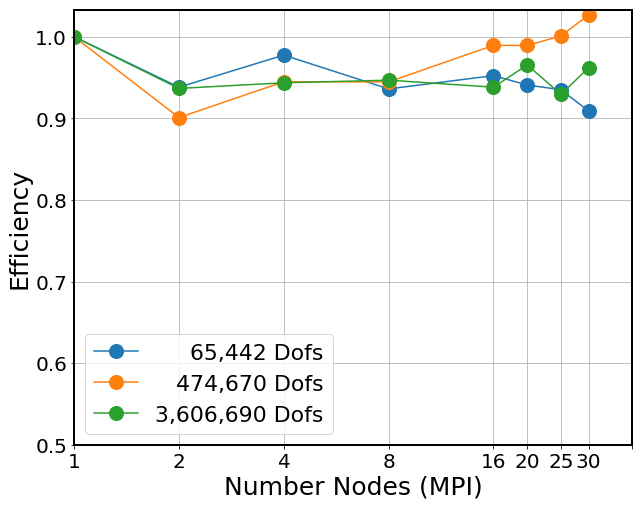

In [67]:
select_columns=['NumberNodes', 'P1', 'P2', 'P4']

fig = df_efficiency[select_columns].plot(
    kind='line', 
    x='NumberNodes', 
    linestyle='-', 
    marker='o', 
    markersize=14,
    figsize=(10, 8)
).get_figure()

plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 20, 25, 30, 40], [1, 2, 4, 8, 16, 20, 25, 30], fontsize=20)
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=20)

# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Nodes (MPI)', fontsize=25)
plt.ylabel('Efficiency', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.05, .72), frameon = True)
plt.legend(labels=["     65,442 Dofs", "   474,670 Dofs", "3,606,690 Dofs"], fontsize=22)
plt.grid()
plt.show()

In [68]:
fname = "efficiency_mpi_lumped_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [69]:
# Select columns
select_columns=['NumberNodes', 'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)', 'P4_L2-Cache-Miss(%)']
df_cache = df[select_columns].copy()
# Calculate percentage multiply by 100.
df_cache["P1_L2-Cache-Miss(%)"] = df_cache["P1_L2-Cache-Miss(%)"]*100
df_cache["P2_L2-Cache-Miss(%)"] = df_cache["P2_L2-Cache-Miss(%)"]*100
df_cache["P4_L2-Cache-Miss(%)"] = df_cache["P4_L2-Cache-Miss(%)"]*100
df_cache

NumberNodes  P1_L2-Cache-Miss(%)  P2_L2-Cache-Miss(%)  P4_L2-Cache-Miss(%)
0            1                 15.0                 20.0                 22.0
1            2                 15.0                 21.0                 22.0
2            4                 10.0                 22.0                 22.0
3            8                 10.0                 24.0                 22.0
4           16                  9.0                 20.0                 23.0
5           20                  9.0                 16.0                 22.0
6           25                  9.0                 15.0                 23.0
7           30                 10.0                 13.0                 24.0

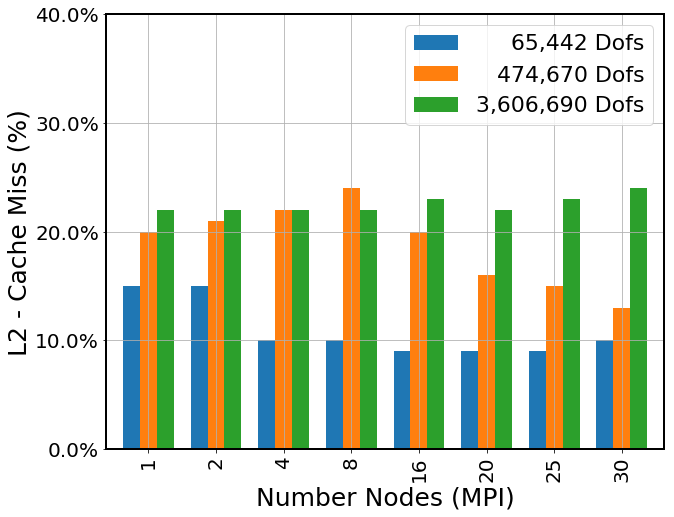

In [70]:
fig = df_cache[["NumberNodes", "P1_L2-Cache-Miss(%)", "P2_L2-Cache-Miss(%)", "P4_L2-Cache-Miss(%)"]].plot(
    kind='bar', 
    x='NumberNodes',
    width=0.75,
    figsize=(10, 8)
).get_figure()

# plt.xticks([1, 2, 4, 8, 16, 20, 40, 50], [1, 2, 4, 8, 16, 20, 40, 50])
plt.xticks(fontsize=20)
plt.yticks([0.0, 10.0, 20.0, 30.0, 40.0], ["0.0%", "10.0%", "20.0%", "30.0%", "40.0%"], fontsize=20)

# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Nodes (MPI)', fontsize=25)
plt.ylabel('L2 - Cache Miss (%)', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.05, .72), frameon = True)
plt.legend(labels=["     65,442 Dofs", "   474,670 Dofs", "3,606,690 Dofs"], fontsize=22)
plt.grid()
plt.show()

In [71]:
fname = "l2-cache-miss_mpi_lumped_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [72]:
# Select columns
select_columns=['NumberNodes', 'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)', 'P4_ParallelRegion(%)']
df_region = df[select_columns].copy()
df_region

NumberNodes  P1_ParallelRegion(%)  P2_ParallelRegion(%)  P4_ParallelRegion(%)
0            1                 99.87                 99.87                 99.92
1            2                 98.13                 93.24                 95.41
2            4                 91.70                 91.54                 89.80
3            8                 94.26                 96.28                 95.65
4           16                 95.42                 95.41                 94.19
5           20                 94.79                 95.01                 96.99
6           25                 93.39                 95.16                 93.10
7           30                 84.05                 89.21                 90.37

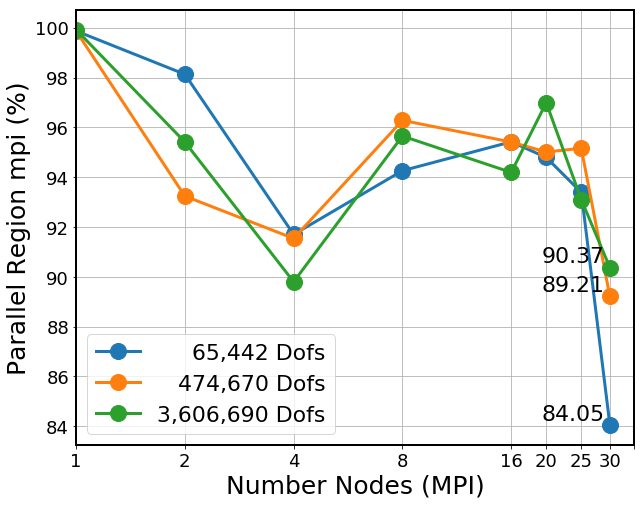

In [108]:
fig = df_region.plot(
    kind='line', 
    x='NumberNodes',
    marker='o',
    markersize=16,
#     alpha=0.3,
    linewidth=3.0,
#     ylim=(0,300),
    figsize=(10, 8)
).get_figure()

plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 20, 25, 30, 35], [1, 2, 4, 8, 16, 20, 25, 30])
# plt.yticks([50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 100.0], [50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 100.0])


# print(int(list(df_region.loc[7])[1]))
xs=[list(df_region.loc[7])[0]]+[list(df_region.loc[7])[0]]+[list(df_region.loc[7])[0]]
#    [list(df_region.loc[3])[0]]+[list(df_region.loc[3])[0]]+[list(df_region.loc[3])[0]]
ys=[list(df_region.loc[7])[1]]+[list(df_region.loc[7])[2]]+[list(df_region.loc[7])[3]]
#    [list(df_region.loc[3])[1]]+[list(df_region.loc[3])[2]]+[list(df_region.loc[3])[3]]

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 fontsize=22,
                 xytext=(-5,5), # distance from text to points (x,y)
                 ha='right') # horizontal alignment can be left, right or center



# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Nodes (MPI)', fontsize=25)
plt.ylabel('Parallel Region mpi (%)', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.35, 0.22), frameon = True)
plt.legend(labels=["     65,442 Dofs", "   474,670 Dofs", "3,606,690 Dofs"], fontsize=22)
plt.grid()
plt.show()

In [110]:
fname = "parallel_region_mpi_lumped_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>